In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mortality-austria-2.csv', sep=';')

In [3]:
df.drop(['die_this_year', 'stationary_current_age', 'stationary'], axis=1, inplace=True)

In [4]:
df.region = df.region.astype('category')
df.gender = df.gender.astype('category')

In [5]:
df.alive_peers = df.alive_peers / 100000

df.rename({'mortality_probability': 'mortality_this_year'}, axis=1, inplace=True)
df['mortality_dist'] = df.mortality_this_year * df.alive_peers
df['dead_peers'] = 1 - df.alive_peers
df['expect'] = df.current_age + df.years_to_live



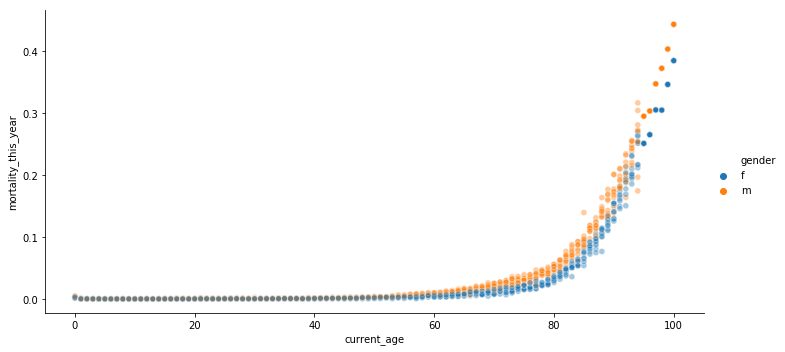

In [6]:
sns.relplot(x='current_age', y='mortality_this_year', data=df, kind='scatter', hue='gender', alpha=0.4, aspect=2)

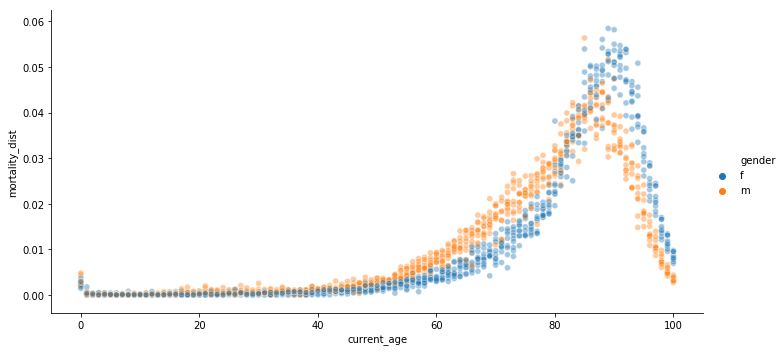

In [7]:
sns.relplot(x='current_age', y='mortality_dist', data=df, kind='scatter', hue='gender', alpha=0.4, aspect=2)

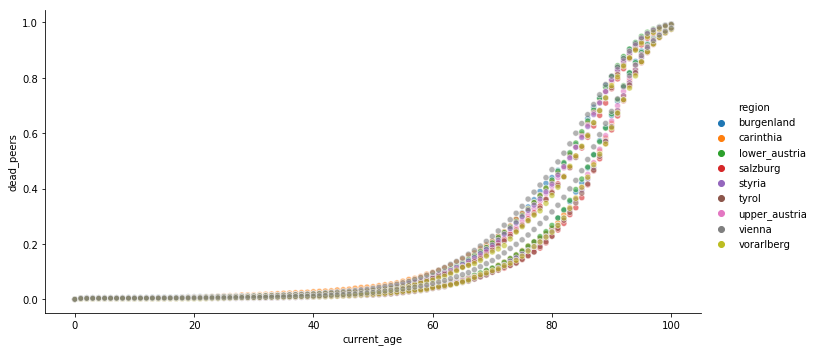

In [8]:
sns.relplot('current_age', 'dead_peers', data=df, kind='scatter', hue='region', alpha=0.6, aspect=2)

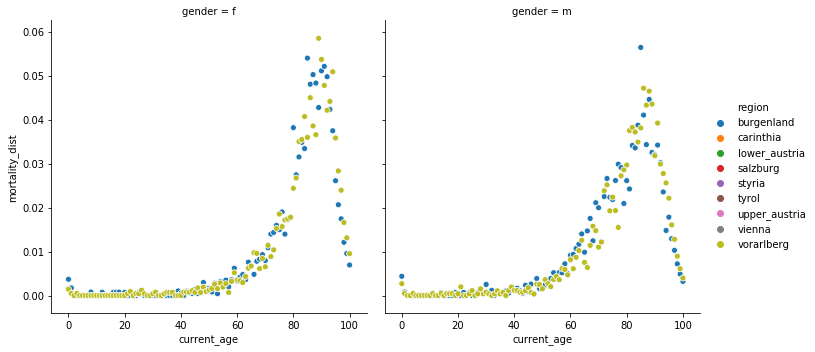

In [9]:
sns.relplot('current_age', 'mortality_dist',
            data=df[(df.region=='burgenland') | (df.region=='vorarlberg')], kind='scatter', hue='region', col='gender',
            alpha=1, aspect=1)

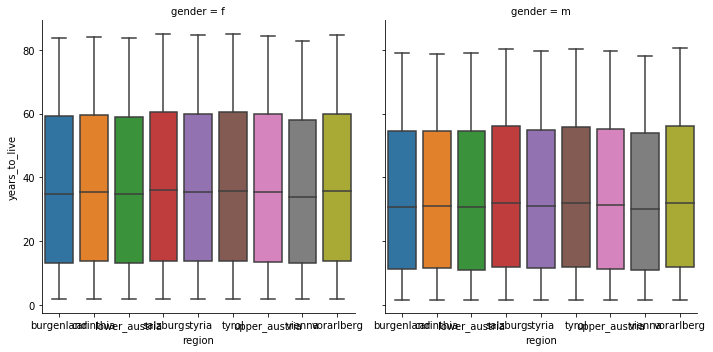

In [10]:
sns.catplot('region', 'years_to_live', data=df, kind='box', col='gender')

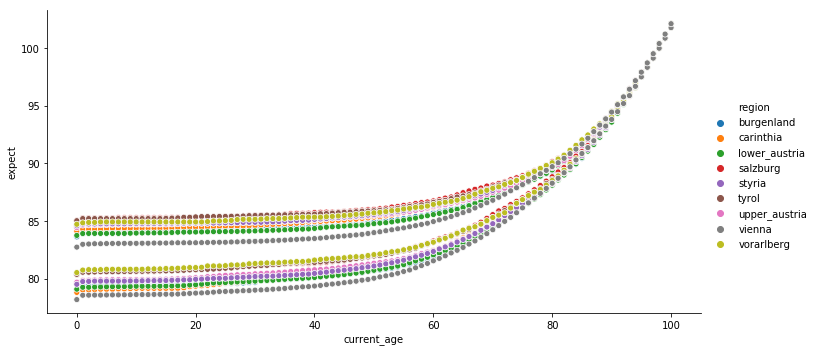

In [11]:
sns.relplot('current_age', 'expect', data=df, hue='region', aspect=2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

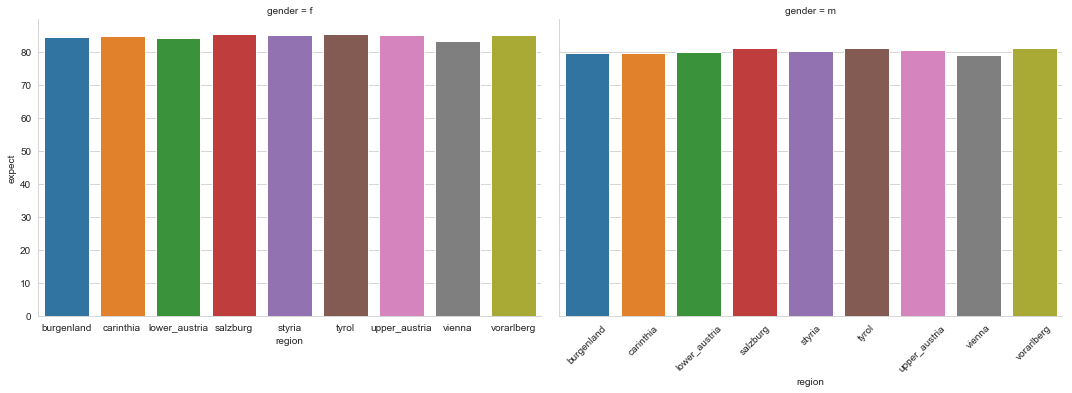

In [12]:
sns.set_style('whitegrid')
sns.catplot('region', 'expect', data=df[df.current_age==27], col='gender', kind='bar', aspect=1.5)
plt.xticks(rotation=45)

In [13]:
df.head()

,region,gender,current_age,mortality_this_year,alive_peers,years_to_live,mortality_dist,dead_peers,expect
0,burgenland,m,0,0.004371,1.000000,79.020671,0.004371,-2.220446e-16,79.020671
1,burgenland,m,1,0.000790,0.995629,78.367101,0.000787,4.370629e-03,79.367101
2,burgenland,m,2,0.000000,0.994843,77.428674,0.000000,5.157299e-03,79.428674
3,burgenland,m,3,0.000000,0.994843,76.428674,0.000000,5.157299e-03,79.428674
4,burgenland,m,4,0.000000,0.994843,75.428674,0.000000,5.157299e-03,79.428674


In [14]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

In [15]:
output_notebook()

Loading BokehJS ...

In [16]:
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool

from bokeh.io import curdoc
from bokeh.layouts import row, column, widgetbox
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.plotting import figure

from bokeh.palettes import Category10_9

In [17]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnarDataSource, Slider, CustomJS
from bokeh.plotting import figure
output_notebook()

genders = df.gender.unique().to_list()
color_mapper = CategoricalColorMapper(factors=genders, palette=['steelblue', 'purple'])

regions = df.region.unique().to_list()
genders = df.gender.unique().to_list()
age = 25

source = ColumnDataSource(data={'x': df.region[df.current_age==age],
                                'y': df.expect[df.current_age==age],
                                'region': df.region[df.current_age==age],
                                'gender': df.gender[df.current_age==age],
                                'age': df.current_age[df.current_age==age],
                                'alive_peers': df.alive_peers[df.current_age==age]
                               })

hover = HoverTool(
    tooltips=[
        ('age', '@age'),
        ('expectancy', '@y'),
        ('region', '@x'),
        ('gender', '@gender'),
        ('alive peers', '@alive_peers')
        
        ])


p = figure(title="simple circle example", plot_height=300, plot_width=600, y_range=(75,105), x_range=regions,
           background_fill_color='#efefef', tools=[hover, 'pan', 'wheel_zoom'])
r = p.circle('x', 'y', size=20, alpha=0.4, color=dict(field='gender', transform=color_mapper), source=source)

def update(age=25):
    #r.data_source.data['x'] = age
    r.data_source.data['y'] = df.expect[df.current_age==age]
    r.data_source.data['age'] = df.current_age[df.current_age==age]
    r.data_source.data['alive_peers'] = df.alive_peers[df.current_age==age]
    push_notebook()

show(p, notebook_handle=True)

interact(update, age=(0,100))

Loading BokehJS ...

interactive(children=(IntSlider(value=25, description='age'), Output()), _dom_classes=('widget-interact',))

<function __main__.update(age=25)>

### Purple circles represent women and blue circles men.

It may seem somewhat contradictory that life expectancy is higher for older people than for young people. However, one must remember that someone who is 25 years old must be the same age as someone who is 80 before they can get any older.